In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_df = pd.read_csv('archive/events.csv')
category_tree_df = pd.read_csv('archive//category_tree.csv')
item_properties_1_df = pd.read_csv('archive//item_properties_part1.csv')
item_properties_2_df = pd.read_csv('archive//item_properties_part2.csv')

In [3]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


- The timestamp portion is in Unix Epoch format e.g. 1433221332117 will be converted to Tuesday, 2 June 2015 5:02:12.117 AM GMT
- visitorId is the unique id of user browsing the website
- event is what user is doing
- itemid unique id for the items
- TransactionId is the id if the user makes any purchase

In [4]:
# Events which has transaction id not null
events_df[events_df.transactionid.notnull()].event.unique()

array(['transaction'], dtype=object)

- Only transaction event has transactionid and rest are view and add to cart events

In [6]:
# Events which has transaction id null
events_df[events_df.transactionid.isnull()].event.unique()

array(['view', 'addtocart'], dtype=object)

### Ananlysis of Item Property

In [7]:
item_properties_1_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


- Property is the Item's attributes such as category id and availability while the rest are hashed for confidentiality purposes
- Value is the item's property value e.g. availability is 1 if there is stock and 0 otherwise
- Values that start with "n" indicate that the value preceeding it is a number e.g. n277.200 is equal to 277.2

### Analysis of Category ID

In [8]:
category_tree_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


- This table describes the relationship of different product with each other.
- Ex : 1016 is a child of parent 213

In [9]:
item_properties_1_df.loc[(item_properties_1_df.property == 'categoryid') & (item_properties_1_df.value == '1016')].sort_values('timestamp').head()

,timestamp,itemid,property,value
6363096,1431226800000,339403,categoryid,1016
8597591,1431226800000,161686,categoryid,1016
7942027,1431226800000,418837,categoryid,1016
10230975,1431226800000,85538,categoryid,1016
7280176,1431226800000,278463,categoryid,1016


### Lets separate the customers into two categories. Customer who boutght something and customers who didnt

In [11]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

-  lets consider all the customers are unique since there is info on whether there are any repeating users

In [12]:
all_customers = events_df.visitorid.unique()
all_customers.size

1407580

In [15]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

1395861

- So there were actually 1,395,861 unique site visitors who didn't buy anything, again assuming that there were no repeat users with different visitor IDs

In [16]:
#Another way to do it using Numpy
temp_array = np.isin(customer_browsed, customer_purchased)
temp_array[temp_array == False].size

1395861

In [17]:
customer_purchased[:10]

array([ 599528,  121688,  552148,  102019,  189384,  350566,  404403,
        505565,  945184, 1406787])

### Journey from viewing to transaction (purchase) of user 102019

In [18]:
events_df[events_df.visitorid == 102019].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


convert the UNIX / Epoch time format to readable format

In [20]:
from datetime import datetime

tz = int('1433221332')
new_time = datetime.fromtimestamp(tz)
new_time.strftime('%Y-%m-%d %H:%M:%S')

'2015-06-02 10:32:12'

### Listing purchases which are bought altogther by the customers so it can be recommended

In [21]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()

purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events_df.loc[(events_df.transactionid.notnull()) & (events_df.visitorid == customer)].itemid.values))

In [22]:
purchased_items[:10]

[[np.int64(356475)],
 [np.int64(15335),
  np.int64(380775),
  np.int64(237753),
  np.int64(317178),
  np.int64(12836),
  np.int64(400969),
  np.int64(105792),
  np.int64(25353),
  np.int64(200793),
  np.int64(80582),
  np.int64(302422)],
 [np.int64(81345)],
 [np.int64(150318), np.int64(49521)],
 [np.int64(310791), np.int64(299044)],
 [np.int64(54058),
  np.int64(284871),
  np.int64(251130),
  np.int64(268335),
  np.int64(183049),
  np.int64(261940),
  np.int64(369093),
  np.int64(370745),
  np.int64(192990),
  np.int64(277119),
  np.int64(241716),
  np.int64(283766),
  np.int64(16417),
  np.int64(217068),
  np.int64(36372),
  np.int64(68923),
  np.int64(428015),
  np.int64(69533),
  np.int64(13520),
  np.int64(385638),
  np.int64(442871),
  np.int64(136526),
  np.int64(247862),
  np.int64(93828),
  np.int64(230911),
  np.int64(382595),
  np.int64(34853),
  np.int64(216260),
  np.int64(154812),
  np.int64(445241),
  np.int64(57702),
  np.int64(347850),
  np.int64(151855),
  np.int64(226

In [23]:
def recommender_bought(item_id, purchased_items):
    recommender_list = []
    for x in purchased_items:
        if item_id in x:
            recommender_list += x

    recommender_list = list(set(recommender_list) - set([item_id]))
    return recommender_list

In [29]:
recommender_bought(302422, purchased_items)

[np.int64(105792),
 np.int64(200793),
 np.int64(12836),
 np.int64(80582),
 np.int64(380775),
 np.int64(15335),
 np.int64(400969),
 np.int64(25353),
 np.int64(237753),
 np.int64(317178)]

What other insights can we gather from the items that were viewed, added to cart and sold?¶
Can we perhaps cluster the visitors and see if classes appear?
For that I will need to create a new dataframe and engineer a few features for it

How many unique visitors did we have for the site from June 2, 2015 to August 1, 2015?

Shown below are the total number of visitors for that time duration (was also shown at the close to the start of this paper)

### Now lets create a function that creates a dataframe with new features: visitorid, number of items viewed, total viewcount, bought something or not

In [35]:
#Put all the visitor id in an array and sort it ascendingly
all_visitors = events_df.visitorid.sort_values().unique()
all_visitors.size

1407580

In [32]:
buying_visitors = events_df[events_df.transactionid.notnull()].visitorid.sort_values().unique()
buying_visitors.size

11719

In [36]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))

In [43]:
len(viewing_visitors_list)

1395861

In [37]:
def create_dataframe(visitor_list):
    array_for_df = []
    for index in visitor_list:

        v_df = events_df[events_df.visitorid == index]

        temp = []
        temp.append(index)
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)
        temp.append(v_df[v_df.event == 'view'].event.count())
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()

        temp.append(number_of_items_bought)
        if number_of_items_bought == 0:
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [38]:
buying_visitors_df = create_dataframe(buying_visitors)

In [39]:
buying_visitors_df.shape

(11719, 5)

there is around 27,821 samples from the viewing visitors list so that there is a 70-30 split for training and test data.

In [40]:
import random
random.shuffle(viewing_visitors_list)

In [41]:
viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])

In [44]:
viewing_visitors_df.shape

(27820, 5)

Combining the buying visitors and viewing visitors

In [45]:
main_df = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)

In [47]:
#shuffle main_df first
main_df = main_df.sample(frac=1)

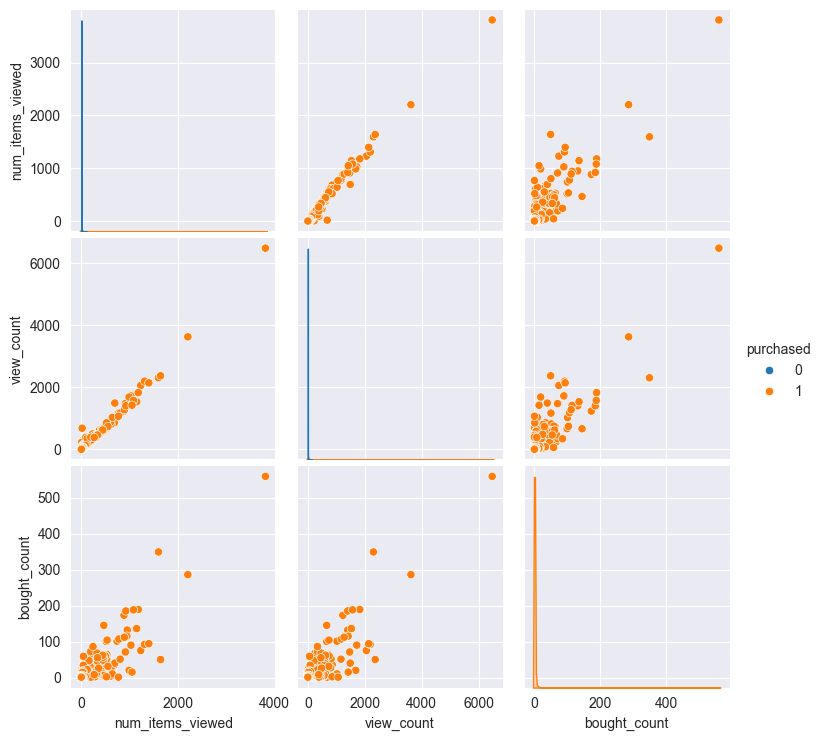

In [48]:
sns.pairplot(main_df, x_vars = ['num_items_viewed', 'view_count', 'bought_count'],
             y_vars = ['num_items_viewed', 'view_count', 'bought_count'],  hue = 'purchased')
plt.show()

The plot above clearly indicates that the higher the view count, the higher the chances of that visitor buying something.

Since the relationship is Linear, let's try a simple Logistic Regression model to predict future visitor purchase behaviour

We separate the features (drop visitorid since it's categorical data and bought count) and the target (which is whether the visitor bought something or not)

In [49]:
X = main_df.drop(['purchased', 'visitorid', 'bought_count'], axis = 'columns')
y = main_df.purchased

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[8066  284]
 [2146 1366]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      8350
           1       0.83      0.39      0.53      3512

    accuracy                           0.80     11862
   macro avg       0.81      0.68      0.70     11862
weighted avg       0.80      0.80      0.77     11862



In [53]:
from sklearn import metrics
print('accuracy = {:7.4f}'.format(metrics.accuracy_score(y_test, y_pred)))

accuracy =  0.7951


Model's accuracy in predicting buying visitors is around 79.51%

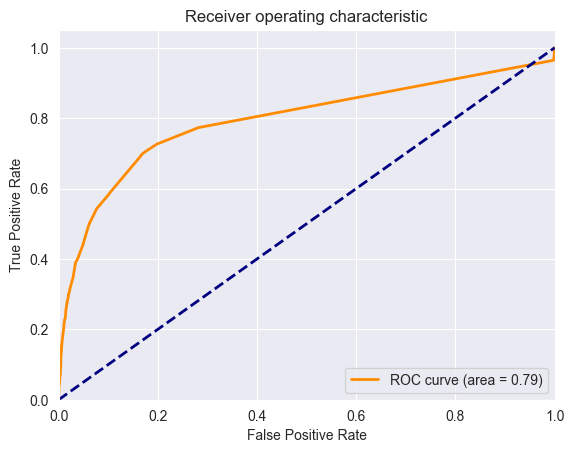

In [54]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

The graph above shows the accuracy of our binary classifier (Logistic Regression). Just means that the closer the orange curve leans to the top left hand part of the graph, the better the accuracy.